In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

In [ ]:
# data 생성

x = np.arange(0, 100, 0.1)  #1000개 시계열 데이터
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)  #RNN입력에 필요한 3차원 데이터인(batch size, timesteps, input_dim)을 맞추기위해 reshape(-1,1)을 통해 (1000,1)행렬로 변환

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


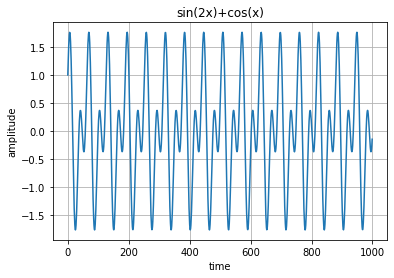

In [ ]:
plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [ ]:
def seq2dataset(seq, window, horizon):

    X = []  #입력 데이터 X를 저장하는 list
    Y = []  #정답 데이터 Y를 저장하는 list

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)] #슬라이싱을 이용하여 x데이터 생성함
        y = (seq[i+window+horizon-1])

        X.append(x) #만들어진 2차원 데이터 행렬을 np.array(X)를 통해서 3차원 텐서로 변환하여 리턴
        Y.append(y)

    return np.array(X), np.array(Y)

In [ ]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [ ]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [ ]:
model = Sequential()

#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 2s 22ms/step - loss: 0.0947 - mae: 0.2148 - val_loss: 0.0126 - val_mae: 0.0889
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0512 - val_loss: 9.8224e-04 - val_mae: 0.0259
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 4.0865e-04 - mae: 0.0158 - val_loss: 9.9603e-05 - val_mae: 0.0080
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 7.6727e-05 - mae: 0.0071 - val_loss: 4.1732e-05 - val_mae: 0.0055
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 3.3691e-05 - mae: 0.0047 - val_loss: 2.5607e-05 - val_mae: 0.0040
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 2.0642e-05 - mae: 0.0037 - val_loss: 1.8931e-05 - val_mae: 0.0036
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 1.6223e-05 - mae: 0.0034 - val_loss: 1.3112e-05 - val_mae: 0.0030
Epoch 8/100
25/25 [=================

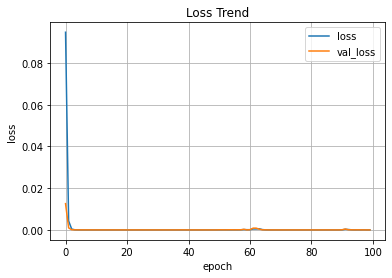

In [ ]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [ ]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

#print(pred[rand_idx])
#print(y_test[rand_idx])


random idx =  [166  30 115  29  50] 

pred  =  [-1.6272347  -0.4413679   0.3008324  -0.14599921  0.07786372]
label =  [-1.62753387 -0.43856091  0.29872679 -0.14322034  0.0762854 ]


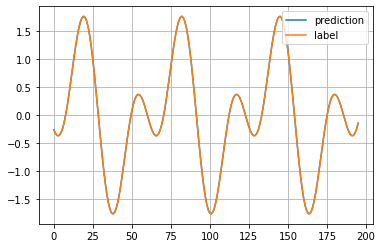

In [ ]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# data 생성

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


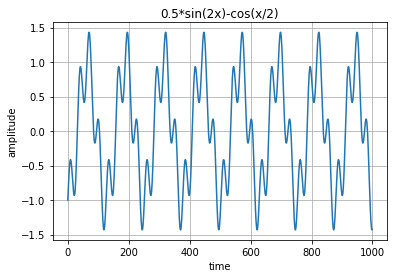

In [ ]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [ ]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [ ]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [ ]:
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 epochs=100, 
                 validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 2s 20ms/step - loss: 0.0720 - mae: 0.1814 - val_loss: 0.0113 - val_mae: 0.0850
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0058 - mae: 0.0595 - val_loss: 0.0022 - val_mae: 0.0373
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0015 - mae: 0.0291 - val_loss: 7.5807e-04 - val_mae: 0.0197
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 6.7984e-04 - mae: 0.0196 - val_loss: 5.7836e-04 - val_mae: 0.0193
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 4.0909e-04 - mae: 0.0158 - val_loss: 2.7645e-04 - val_mae: 0.0124
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 3.4604e-04 - mae: 0.0141 - val_loss: 2.0839e-04 - val_mae: 0.0103
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 2.6378e-04 - mae: 0.0126 - val_loss: 1.5812e-04 - val_mae: 0.0095
Epoch 8/100
25/25 [=====================

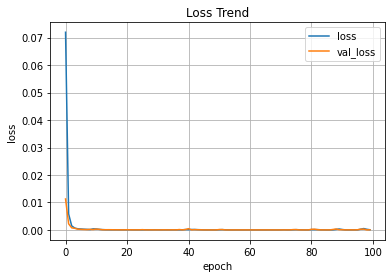

In [ ]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [ ]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [150  79 187  94  13] 

pred  =  [ 1.2000071  -0.66411585 -0.8906637  -0.8511139   1.018901  ]
label =  [ 1.20995756 -0.67515992 -0.89279264 -0.86007573  1.01854352]


random idx =  [ 41 136 155  11 139] 

pred  =  [-0.1374797   0.75595766  0.58687437  0.82024056  1.0515078 ]
label =  [-0.14020025  0.75457363  0.5966764   0.81843408  1.05178466]


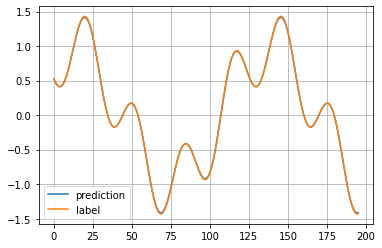

In [ ]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()